In [1]:
include("src/figures.jl")

LoadError: SystemError: opening file "/gpfs/fs1/home/n/ngrisoua/atkin163/filament-instability/notebooks/src/figures.jl": No such file or directory

In [8]:
runnames = ["Ro08Ri000Ek0A15", "Ro08Ri001Ek0A15_1", "Ro08Ri010Ek0A15", "Ro08Ri020Ek0A15"]
runtitles = [L"0.0", L"0.01", L"0.1", L"0.2"];

In [9]:
shear_production_figs = shear_production.(runnames)
#secondary_circulation_contribution_figs = secondary_circulation_contribution.(runnames; mode="energy")
#secondary_circulation_contribution_sum_figs = secondary_circulation_contribution.(runnames; mode="sum");

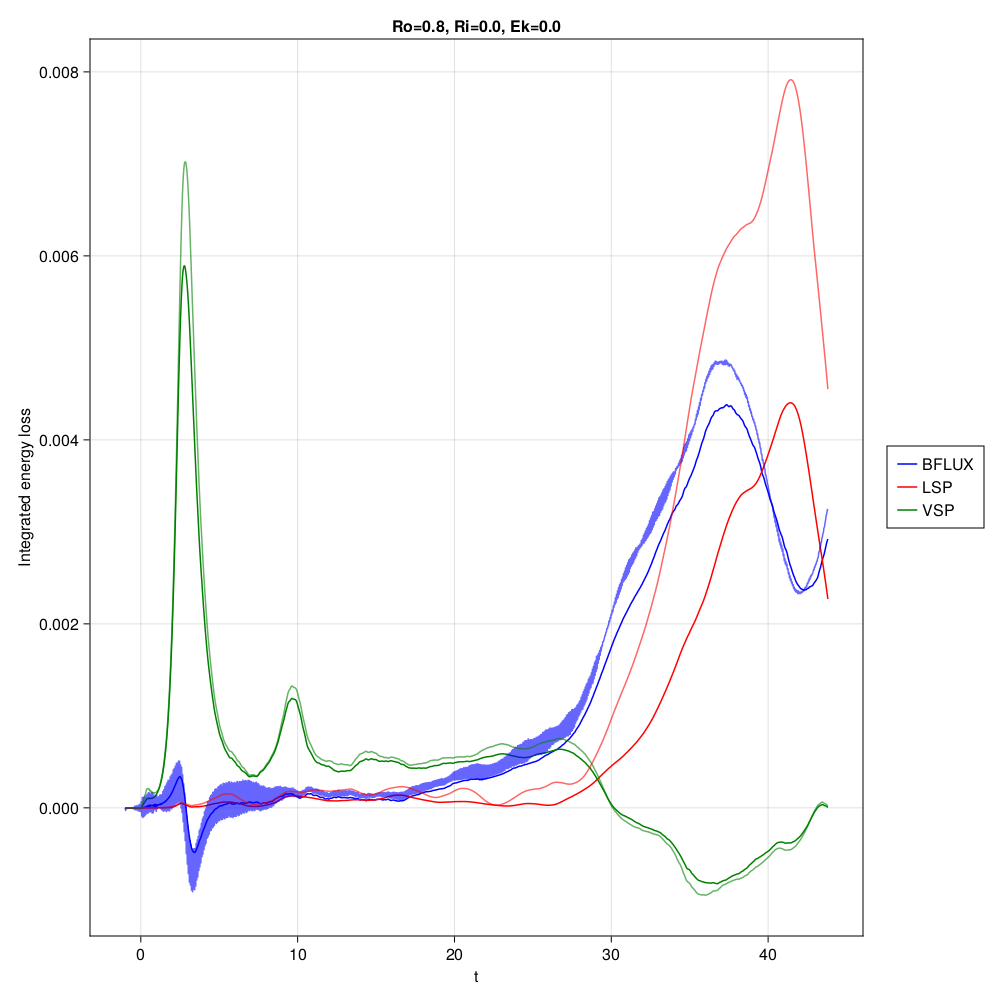

In [24]:
shear_production_figs[1]

In [18]:
[save("output/figures/spboth$runname.png", fig) for (fig, runname) in zip(shear_production_figs, runnames)];

# Filament state

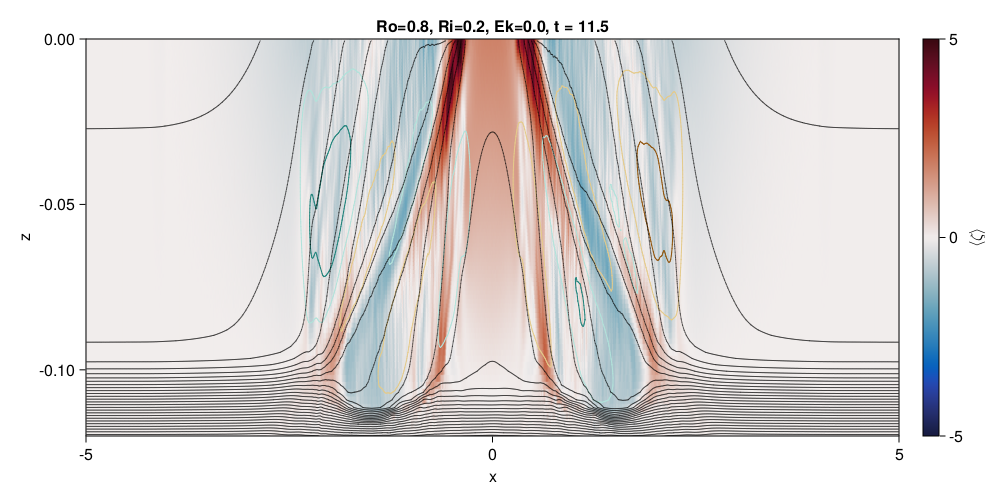

In [31]:
make_filament_state("Ro08Ri020Ek0A15", 1251)

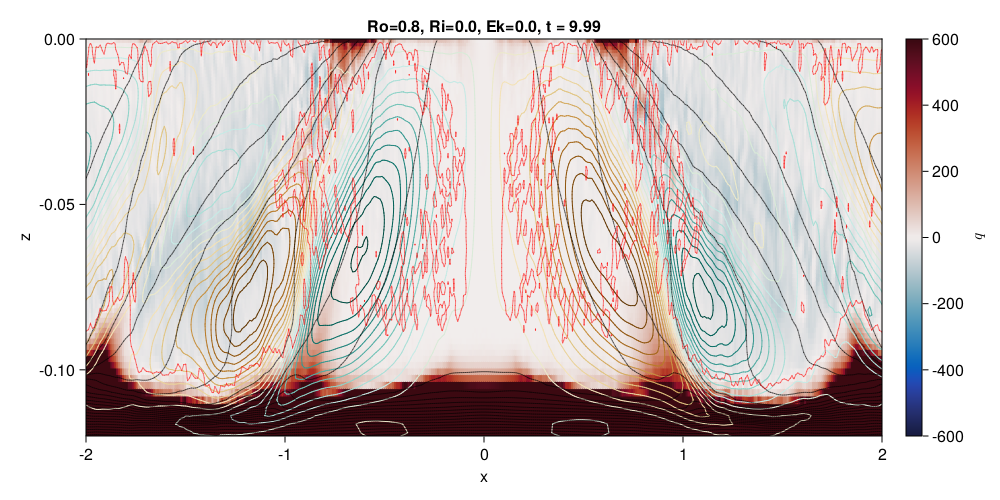

In [81]:
makeqvid("Ro08Ri001Ek0A15_1", 1100)

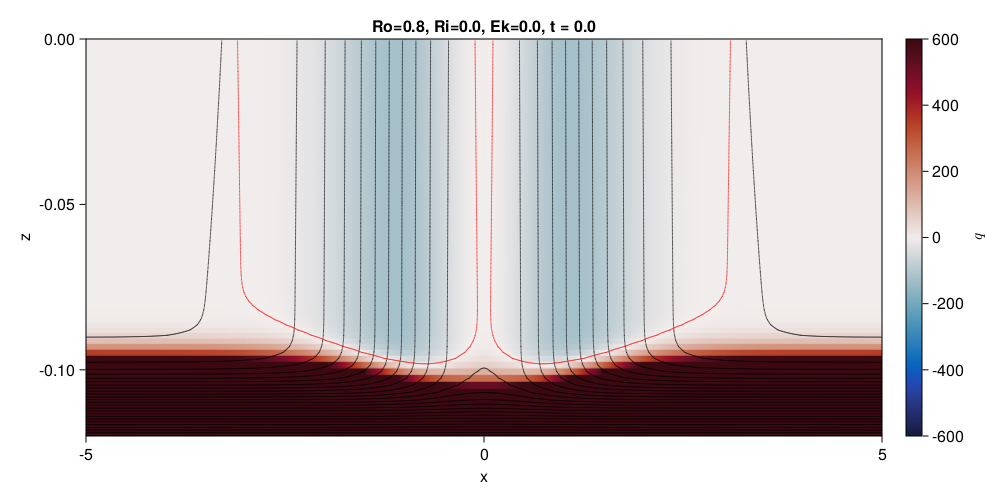

In [45]:
makeqvid(runnames[2], 101)

# Total negative PV

In [33]:
∇b²s = map(make_∇b²_timeseries, runnames);
Vqs = map(make_Vq_timeseries, runnames);
#δs = map(make_δ_timeseries, runnames);
us = map(make_u_timeseries, runnames);

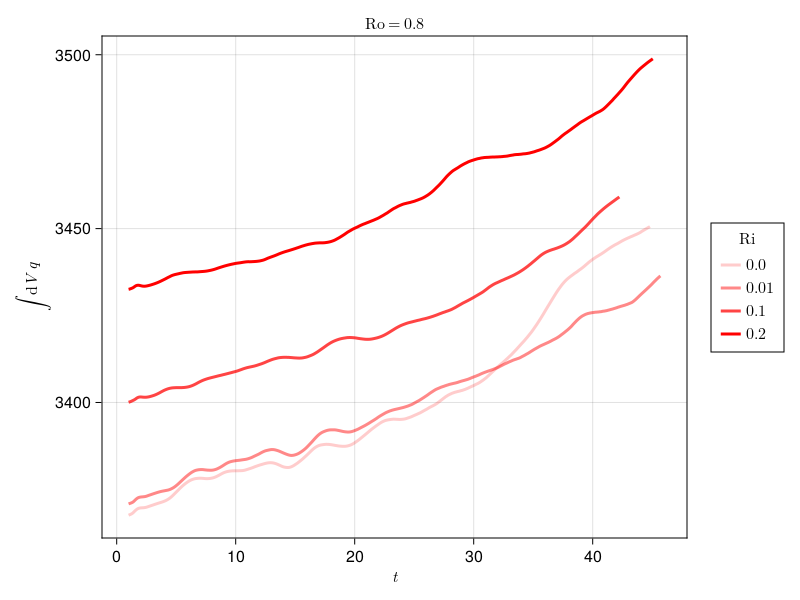

In [65]:
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1]; xlabel=L"t", ylabel=L"\int \text {d} V \;q", title=L"\text{Ro} = 0.8")
lns = [lines!(ax, Vq[1], Vq[2], color=(:red, j), linewidth=3) for (Vq, j) in zip(Vqs, range(0.2, 1, 4))]
Legend(fig[1, 2], lns, runtitles, L"\text{Ri}")
fig

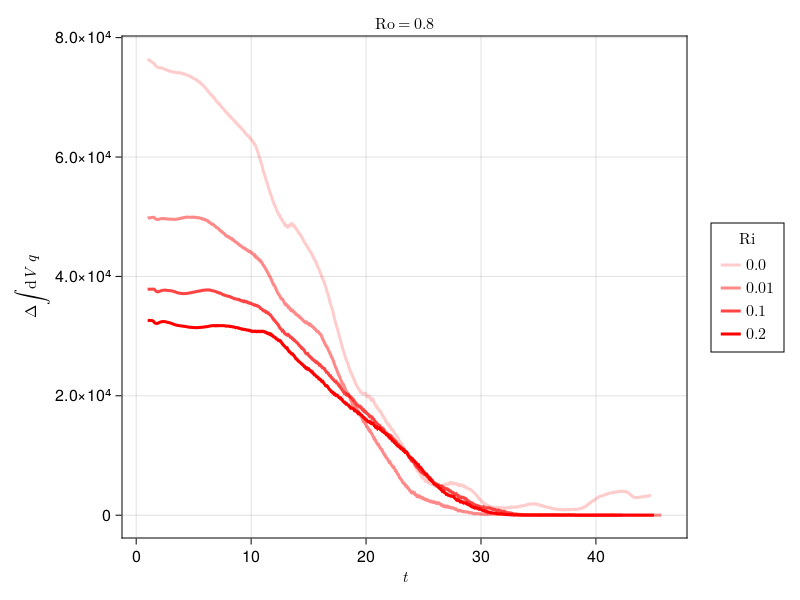

In [30]:
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1]; xlabel=L"t", ylabel=L"\Delta\int \text {d} V \;q", title=L"\text{Ro} = 0.8")
lns = [lines!(ax, Vq[1], Vq[2], color=(:red, j), linewidth=3) for (Vq, j) in zip(Vqs, range(0.2, 1, 4))]
Legend(fig[1, 2], lns, runtitles, L"\text{Ri}")
fig

# Frontogenesis rate

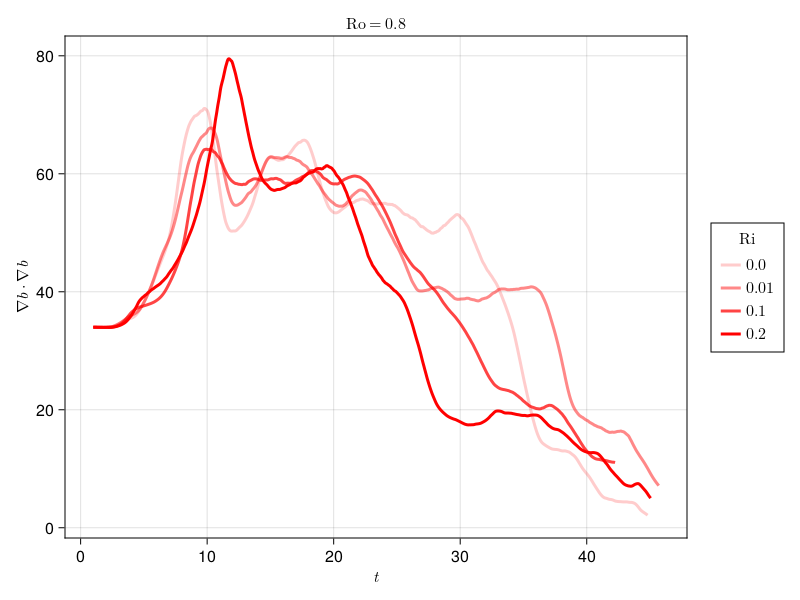

In [17]:
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1]; xlabel=L"t", ylabel=L"\nabla b \cdot \nabla b", title=L"\text{Ro} = 0.8")
lns = [lines!(ax, ∇b²[1], ∇b²[2], color=(:red, j), linewidth=3) for (∇b², j) in zip(∇b²s, range(0.2, 1, 4))]
Legend(fig[1, 2], lns, runtitles, L"\text{Ri}")
fig

# Divergence

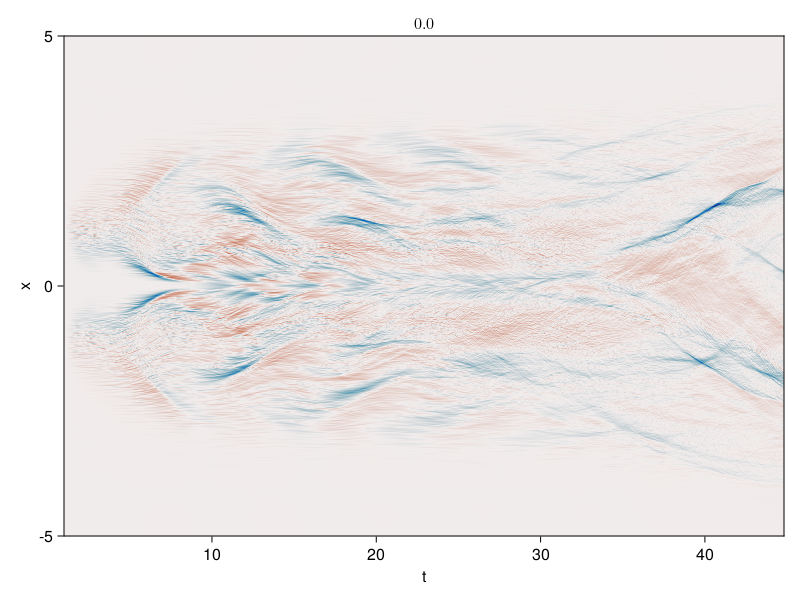

In [42]:
i=1
fig = let δ = δs[i]
    fig = Figure()
    ax = Axis(fig[1, 1]; title = runtitles[i], xlabel="t", ylabel="x")
    heatmap!(ax, δ[1], δ[2], δ[3], colormap=:balance, colorrange=(-3, 3))
    fig
end

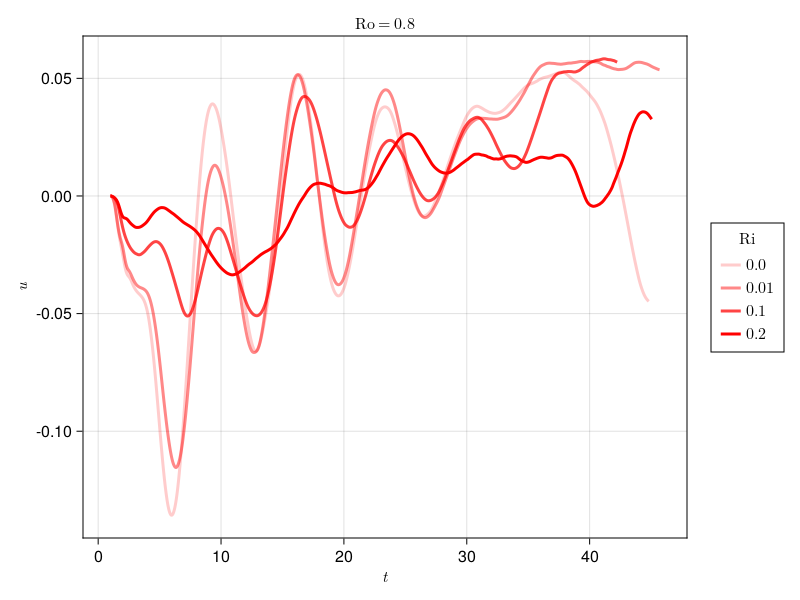

In [19]:
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1]; xlabel=L"t", ylabel=L"u", title=L"\text{Ro} = 0.8")
lns = [lines!(ax, u[1], u[2], color=(:red, j), linewidth=3) for (u, j) in zip(us, range(0.2, 1, 4))]
Legend(fig[1, 2], lns, runtitles, L"\text{Ri}")
fig

# Secondary circulation averaged over negative pv region

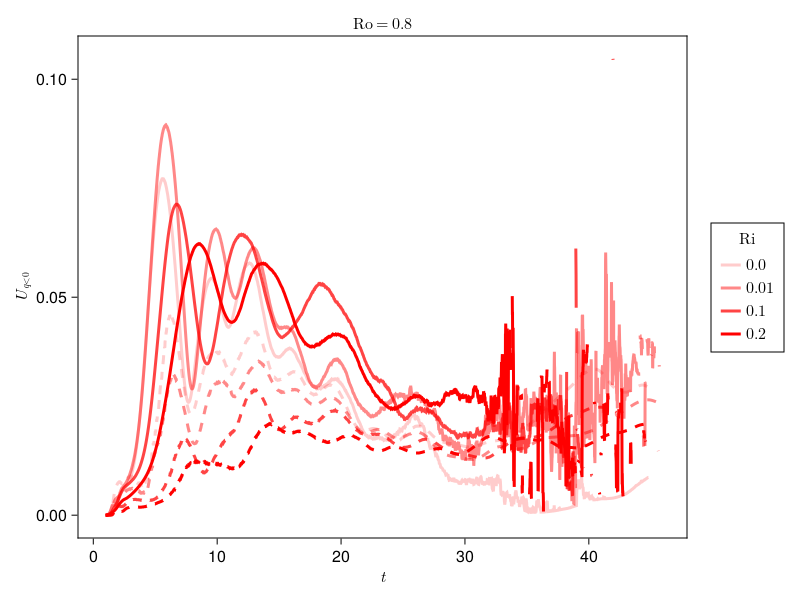

In [22]:
Us = U_by_pv_sign.(runnames)
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1]; xlabel=L"t", ylabel=L"U_{q < 0}", xgridvisible=false, ygridvisible=false, title=L"\text{Ro} = 0.8")
lns05neg = [lines!(ax, U[1], U[2]; color=(:red, j), linewidth=3) for (U, j) in zip(Us, range(0.2, 1, 4))]
lns05pos = [lines!(ax, U[1], U[3]; color=(:red, j), linestyle=:dash, linewidth=3) for (U, j) in zip(Us, range(0.2, 1, 4))]
Legend(fig[1, 2], lns05neg, runtitles, L"\text{Ri}")
fig

# xy plots to assess down-front instabilities

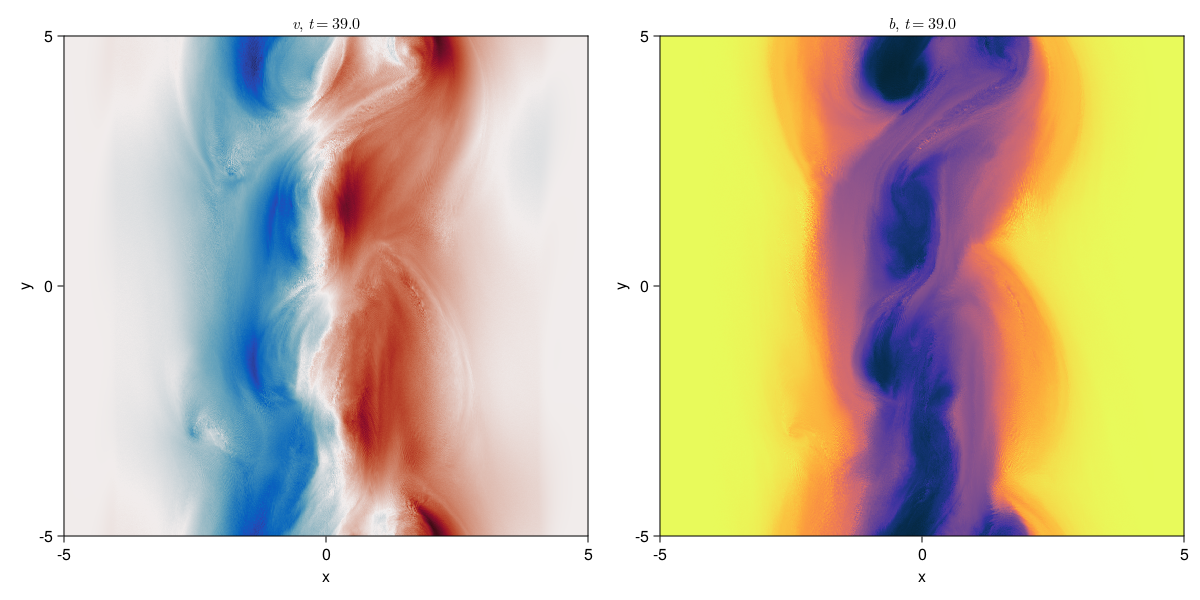

In [61]:
runname = runnames[4]
foldername = "../scratch/filament-instability/$runname/checkpoints"
checkpoint = readdir(foldername)[4]
xs, ys, v_data, b_data, t = jldopen("$foldername/$checkpoint") do file
    file["grid"].xᶜᵃᵃ[1:1024], file["grid"].yᵃᶜᵃ[1:1024], file["v/data"][1:1024, 1:1024, 128-48], file["b/data"][1:1024, 1:1024, 128-48], file["clock"].time - 1
    end;
fig = Figure(; resolution=(1200, 600))
ax = Axis(fig[1, 1]; xlabel="x", ylabel="y", title = L"v,\; t = %$t")
heatmap!(ax, xs, ys, v_data, colorrange=(-maximum(abs.(v_data)), maximum(abs.(v_data))), colormap=:balance)
ax = Axis(fig[1, 2]; xlabel="x", ylabel="y", title = L"b,\; t = %$t")
heatmap!(ax, xs, ys, b_data, colorrange=(minimum(b_data), mean(b_data[1, :])), colormap=:thermal)
fig

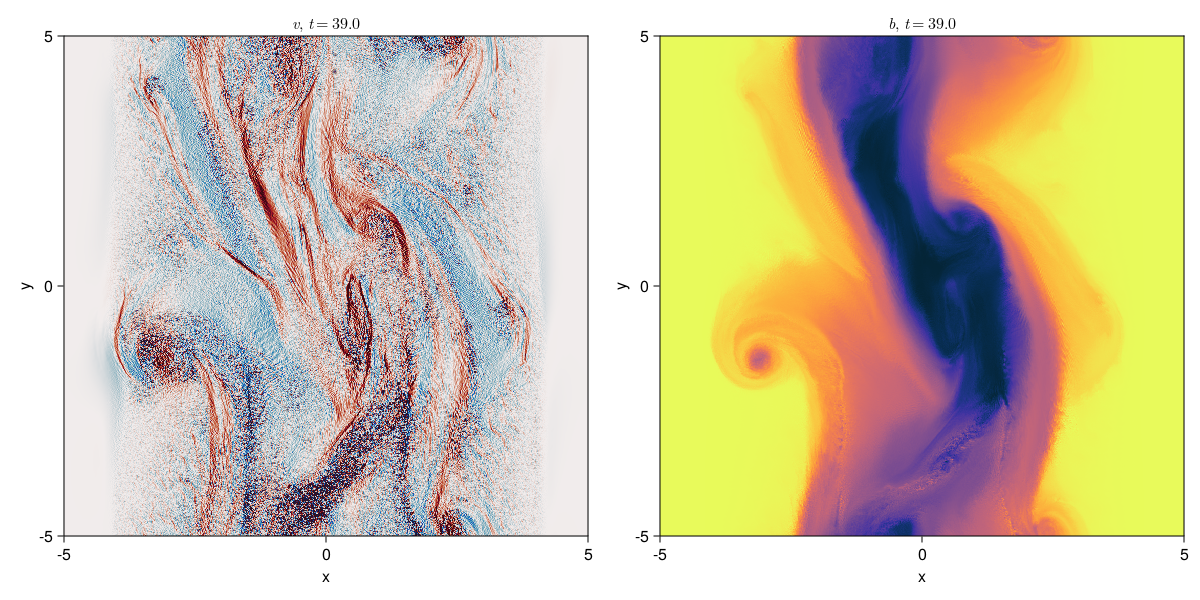

In [54]:
fig = Figure(; resolution=(1200, 600))
ax = Axis(fig[1, 1]; xlabel="x", ylabel="y", title = L"v,\; t = %$t")
heatmap!(ax, xs, ys, v_data, colorrange=(-0.1, 0.1), colormap=:balance)
ax = Axis(fig[1, 2]; xlabel="x", ylabel="y", title = L"b,\; t = %$t")
heatmap!(ax, xs, ys, b_data, colorrange=(minimum(b_data), mean(b_data[1, :])), colormap=:thermal)
fig